<a href="https://colab.research.google.com/github/Hidrovales/Balanco_Hidrico/blob/main/Exemplo_balanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SIMULAÇÃO DO BALANÇO HÍDRICO DA CULTURA DO MILHO

<table>
  <tr>
    <td><img src="https://github.com/Hidrovales/Balanco_Hidrico/blob/main/Figuras/salinas_vertical_jpg.jpg?raw=true" width="100"></td>
    <td><img src="https://github.com/Hidrovales/Balanco_Hidrico/blob/main/Figuras/COLORlogohorizontal.png?raw=true" width="100"></td>
  </tr>
</table>


[HIDROVALES - GRUPO DE PESQUISA EM RECURSOS HÍDRICOS E AMBIENTAIS DO NORTE DE MINAS GERAIS](http://www.hidrovales.com.br/)

Patrícia O. Lucas, Marcelo R. Vicente e Ronaldo M. Santos

###Pacotes

In [1]:
!git clone https://github.com/Hidrovales/Balanco_Hidrico.git

Cloning into 'Balanco_Hidrico'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 237 (delta 126), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (237/237), 1.50 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import numpy as np
from Balanco_Hidrico import Calcula_ETo, Balanco_Hidrico

###Cálculo da $ET_o$

In [3]:
#Dataset de dados climáticos
dataset =  pd.read_csv('https://raw.githubusercontent.com/Hidrovales/Balanco_Hidrico/main/Datasets/RIO_PARDO_MINAS_AJUSTADO.csv',delimiter=',' )
dataset = dataset.drop(["Unnamed: 0"],axis=1) #-------------------> Exclusão de colunas

In [4]:
#Constantes importantes
latitude = -15.72305554 #--em graus
altitude = 850.06  #--em metros

#: Solar constant [ MJ m-2 min-1]
GSC = 0.0820

# Stefan Boltzmann constant [MJ K-4 m-2 dia-1]
sigma = 0.000000004903

#Fluxo de calor do solo (G) para o período de 1 dia ou 10 dias
G = 0

In [5]:
#Cálculo da ETo
serie_eto = Calcula_ETo.gera_serie(dataset['TEMPERATURA_MINIMA'], dataset['TEMPERATURA_MAXIMA'], dataset['UMIDADE_RELATIVA'], 
                                   dataset['VELOCIDADE_VENTO'], dataset['J'], latitude, altitude, GSC, sigma, G, 
                                   dataset['TEMPERATURA_MEDIA'])


In [7]:
eto = {'DATA':dataset['DATA'].values,'ETO':serie_eto}
eto = pd.DataFrame(eto)
eto['DATA']= pd.to_datetime(eto['DATA'])

P = {'DATA':dataset['DATA'].values,'PRECIPITACAO_TOTAL':dataset['PRECIPITACAO_TOTAL']}
P = pd.DataFrame(P)
P['DATA']= pd.to_datetime(P['DATA'])

###Balanço hídrico

In [8]:
#Informações do usuário
#Informações do usuário
periodo = {'inicial': 15, 'desenvolvimento': 30, 'media': 60, 'final': 15}
z_etapas = {'inicial': 0.15, 'media': 0.40, 'final': 0.30}
forma_z = {'inicial': True, 'desenvolvimento': False, 'media': True, 'final': False}
kc_etapas = {'inicial': 0.5, 'media': 1.2, 'final': 0.8}
forma_kc = {'inicial': True, 'desenvolvimento': False, 'media': True, 'final': False}
data_in = {'dia': 1, 'mes': 1, 'ano': 2020}
theta_fc = 0.23
theta_wp = 0.1
p = 0.5

In [10]:
database_path = '/content/drive/MyDrive/Hidrovales/PROJETO_BALANCO_HIDRICO/experimentos/teste.db'

In [11]:
Balanco_Hidrico.balanco('rio pardo', 'milho', theta_fc, theta_wp, p, P, eto, periodo, z_etapas, forma_z, kc_etapas, forma_kc, data_in, database_path)

In [12]:
df = pd.DataFrame(Balanco_Hidrico.execute("SELECT * FROM results", database_path))
df.columns = ['LOCAL', 'CULTURA', 'DATA_PLANTIO', 'KC_INICIAL', 'KC_MEDIO', 'KC_FINAL', 'ZR_INICIAL', 'ZR_MEDIO', 'ZR_FINAL',
                'PERIODO_INICIAL', 'PERIODO_DESENVOLVIMENTO', 'PERIODO_MEDIO', 'PERIODO_FINAL', 'P', 'THETA_FC', 'THETA_WP',
                'ETO', 'PRECIPITACAO', 'KC', 'ZR', 'ADT', 'AFA', 'DIN', 'DFIM', 'KS', 'I', 'DP', 'ETCA', 'FC', 'PMP', 'F', 'UA']

In [17]:
df

,LOCAL,CULTURA,DATA_PLANTIO,KC_INICIAL,KC_MEDIO,KC_FINAL,ZR_INICIAL,ZR_MEDIO,ZR_FINAL,PERIODO_INICIAL,PERIODO_DESENVOLVIMENTO,PERIODO_MEDIO,PERIODO_FINAL,P,THETA_FC,THETA_WP,ETO,PRECIPITACAO,KC,ZR,ADT,AFA,DIN,DFIM,KS,I,DP,ETCA,FC,PMP,F,UA
0,rio pardo,milho,2020-01-01 00:00:00,0.5,1.2,0.8,0.15,0.4,0.3,15,30,60,15,0.5,0.23,0.1,b'p\xb0w\xdb\x1a\xa9\x11@\xb0\x06\xfa\x03\x15\...,b'333333\x13@\x00\x00\x00\x00\x00\x00\x00\x00\...,b'\x00\x00\x00\x00\x00\x00\xe0?\x00\x00\x00\x0...,b'333333\xc3?333333\xc3?333333\xc3?333333\xc3?...,b'\x00\x00\x00\x00\x00\x803@\x00\x00\x00\x00\x...,b'\x00\x00\x00\x00\x00\x80#@\x00\x00\x00\x00\x...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,b'\x00\x00\x00\x00\x00\x00\x00\x00\xb0\x06\xfa...,b'\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x0...,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",b'\xf6\xb5\xee\x8aK\xbd\x04@\x00\x00\x00\x00\x...,b'p\xb0w\xdb\x1a\xa9\x01@\xb0\x06\xfa\x03\x15\...,b'\x00\x00\x00\x00\x00@A@\x00\x00\x00\x00\x00@...,b'\x00\x00\x00\x00\x00\x00.@\x00\x00\x00\x00\x...,b'\x00\x00\x00\x00\x00\xc08@\x00\x00\x00\x00\x...,b'\x00\x00\x00\x00\x00@A@\x00\x00\x00\x00\x00@...


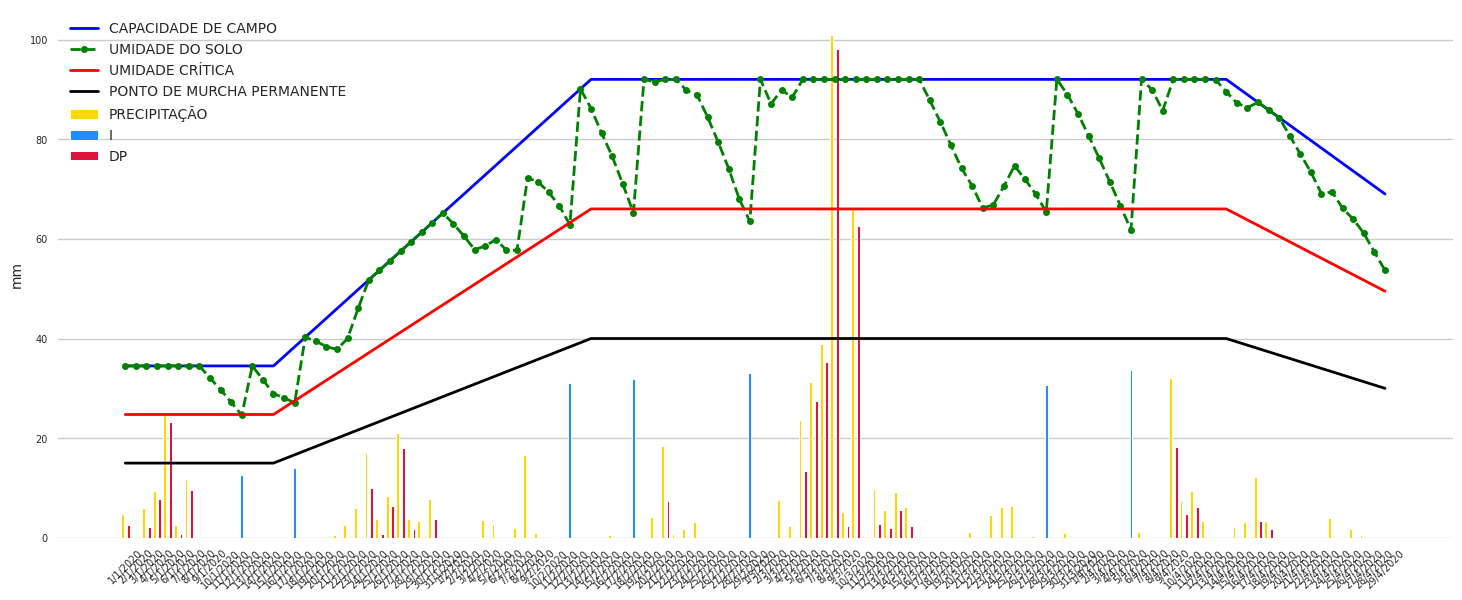

In [22]:
Balanco_Hidrico.plot_balanco(df.loc[0],figsize=(18,7))